In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_booking.csv')

# Display the first few rows of the dataset to understand its structure
print("Initial DataFrame:")
print(df.head())

# Check the column names
print("Column names in the dataset:", df.columns.tolist())

# Step 1: Identify categorical columns
# Based on your description, these are the categorical columns
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin',
                       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

# Step 2: Ensure the columns are stripped of any leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 3: Check for missing columns
missing_columns = [col for col in categorical_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the dataset: {missing_columns}")
else:
    # Step 4: Apply one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head())

Initial DataFrame:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0           

In [20]:
# Scale the numerical columns using standardization
scaler = StandardScaler()
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [21]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv('customer_booking.csv')

# One-hot encode categorical variables including 'flight_day'
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin', 'flight_day'], drop_first=True)

# Separate features and target variable
X = df_encoded.drop('booking_complete', axis=1)  # Features
y = df_encoded['booking_complete']                 # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
print(X.shape)  # Output: (number_of_samples, number_of_features)
print(y.shape)  # Output: (number_of_samples,)

(50000, 918)
(50000,)


In [30]:
print(X_train.shape, X_test.shape)  # Output: (train_samples, number_of_features), (test_samples, number_of_features)
print(y_train.shape, y_test.shape)  # Output: (train_samples,), (test_samples,)

(40000, 918) (10000, 918)
(40000,) (10000,)


In [31]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.85


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Perform cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Test set accuracy: ", accuracy)
print("Test set precision: ", precision)
print("Test set recall: ", recall)
print("Test set F1 score: ", f1)
print("Confusion matrix: \n", conf_mat)

Cross-validation scores:  [0.84825  0.848    0.849875 0.8475   0.854125]
Average cross-validation score:  0.84955
Test set accuracy:  0.855
Test set precision:  0.5412087912087912
Test set recall:  0.1331081081081081
Test set F1 score:  0.21366594360086769
Confusion matrix: 
 [[8353  167]
 [1283  197]]


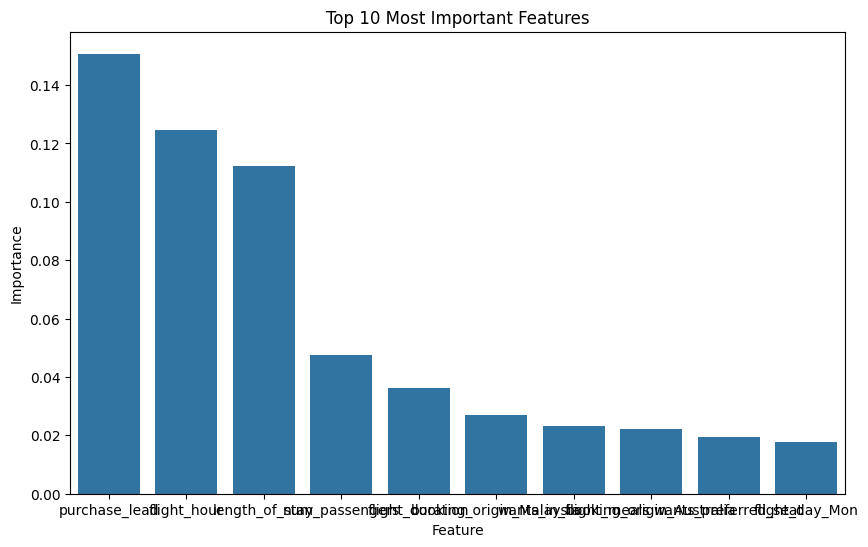

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort the DataFrame by importance scores
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='importance', data=feature_importances_df.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()